# Task 4: Forecasting Financial Access and Digital Payment Usage (2025–2027)

**Objectives:**
- Forecast Ethiopia’s account ownership (Access) and digital payment usage for 2025–2027.
- Use trend regression, event-augmented modeling, and scenario analysis.
- Generate baseline, event-adjusted, and scenario forecasts with confidence intervals.
- Visualize forecasts and quantify uncertainty.
- Provide clear interpretation of results, key drivers, and uncertainties.


In [2]:
# -------------------------------
# Task 4: Forecasting Access and Usage (2025–2027)
# Notebook Setup: Imports and src connection
# -------------------------------

# Standard libraries
import os
from datetime import datetime
from typing import List, Dict

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure inline plotting
%matplotlib inline

# -------------------------------
# Connect to src folder
# -------------------------------
import sys

# Add the src directory to the path (adjust if your folder structure changes)
BASE_DIR = os.path.dirname(os.path.abspath("__file__"))
SRC_DIR = os.path.join(BASE_DIR, "../src")  # src folder relative to notebook
if SRC_DIR not in sys.path:
    sys.path.append(SRC_DIR)

# -------------------------------
# Import Task 4 functions from src
# -------------------------------
from forecasting_model import (
    run_forecast_pipeline,
    fit_trend_model,
    forecast_trend,
    apply_event_impacts,
    build_scenarios,
    compute_confidence_intervals,
    summarize_forecast
)

# -------------------------------
# Notebook ready for Task 4 forecasting
# -------------------------------

print("Imports successful. Notebook connected to src.")

Imports successful. Notebook connected to src.


1. Define Target

In [3]:
# -------------------------------
# Step 1: Define Forecasting Targets
# -------------------------------

# Forecasting Targets
# - access: Account Ownership Rate (%)
# - usage: Digital Payment Usage (%)

targets = {
    "access": "Account Ownership Rate (%)",
    "usage": "Digital Payment Usage (%)"
}

# Display targets
print("Forecasting targets defined:")
for key, desc in targets.items():
    print(f"{key}: {desc}")

Forecasting targets defined:
access: Account Ownership Rate (%)
usage: Digital Payment Usage (%)


2.	Select Approach Given sparse data (5 Findex points over 13 years), consider:

In [15]:

# Import required functions from src
from src.forecasting_model import fit_trend_model, forecast_trend
import pandas as pd

# -------------------------
# 1. Load historical data
# -------------------------
historical_file = "../data/processed/ethiopia_fi_enriched_data.csv"
historical_df = pd.read_csv(historical_file)

# -------------------------
# 2. Define forecasting targets
# -------------------------
# Make sure these match 'indicator' values in your data
targets = {
    "access": "Account Ownership Rate",         # account ownership
    "usage": "Mobile Money Activity Rate"       # digital payment usage
}

# -------------------------
# 3. Aggregate historical values per fiscal year
# -------------------------
historical_values_dict = {}

for key, indicator_name in targets.items():
    # Filter data for the indicator
    indicator_df = historical_df[historical_df['indicator'] == indicator_name]
    
    if indicator_df.empty:
        raise ValueError(f"No historical data found for indicator '{indicator_name}'")
    
    # Aggregate multiple observations per year (mean)
    historical_values = (
        indicator_df.groupby('fiscal_year')['value_numeric']
        .mean()
        .reset_index()
        .rename(columns={'fiscal_year': 'year', 'value_numeric': 'value'})
    )
    
    historical_values_dict[key] = historical_values
    print(f"\nHistorical values for {key} ({indicator_name}):")
    print(historical_values)

# -------------------------
# 4. Prepare placeholder event impacts and schedule
# -------------------------
# To be replaced with Task 3 outputs in Step 3
event_impacts = {
    "Telebirr_Launch": 1.5,       # example % impact
    "NFIS-II_Strategy": 2.0       # example % impact
}

event_schedule = {
    "Telebirr_Launch": [2021],
    "NFIS-II_Strategy": [2022]
}

# -------------------------
# 5. Fit Trend Model and Generate Baseline Forecast
# -------------------------
forecast_years = [2025, 2026, 2027]

trend_models = {}
baseline_forecasts = {}

for key, df in historical_values_dict.items():
    # Fit linear trend model
    model = fit_trend_model(df, year_col='year', value_col='value', log_transform=False)
    trend_models[key] = model
    
    # Generate baseline forecast
    baseline = forecast_trend(model, years=forecast_years, log_transform=False)
    baseline_forecasts[key] = baseline
    
    print(f"\nBaseline forecast for {key}:")
    print(baseline)


Historical values for access (Account Ownership Rate):
   year  value
0  2014   22.0
1  2017   35.0
2  2021   46.0
3  2024   49.0
4  2025   70.0

Historical values for usage (Mobile Money Activity Rate):
   year  value
0  2024   66.0

Baseline forecast for access:
2025    61.576037
2026    65.154378
2027    68.732719
dtype: float64

Baseline forecast for usage:
2025    66.0
2026    66.0
2027    66.0
dtype: float64


3.	Generate Forecasts

In [16]:
# -------------------------
# Step 3: Generate Forecasts
# -------------------------

# Import functions from src
from src.forecasting_model import (
    run_forecast_pipeline
)

# -------------------------
# 1. Define forecast years
# -------------------------
forecast_years = [2025, 2026, 2027]

# -------------------------
# 2. Define dummy event impacts and schedule (from Task 3, can update later)
# -------------------------
# Example structure:
# event_impacts = {"Telebirr_Launch": 2.0}  # 2 percentage points impact
# event_schedule = {"Telebirr_Launch": [2021, 2025]}  # years of effect

event_impacts = {}  # placeholder, replace with Task-3 outputs
event_schedule = {}  # placeholder, replace with Task-3 outputs

# -------------------------
# 3. Generate forecasts for each target
# -------------------------
forecasts = {}

for key, indicator_name in targets.items():
    
    # Filter and aggregate historical values for this indicator
    indicator_df = historical_df[historical_df['indicator'] == indicator_name]
    historical_values = (
        indicator_df.groupby('fiscal_year')['value_numeric']
        .mean()
        .reset_index()
        .rename(columns={'fiscal_year': 'year', 'value_numeric': 'value'})
    )
    
    # Skip if no data available
    if historical_values.empty:
        print(f"No historical data found for {indicator_name}. Skipping.")
        continue

    # Run the forecast pipeline (trend + events + scenarios)
    forecast_table = run_forecast_pipeline(
        historical_df=historical_values,
        year_col='year',
        value_col='value',
        forecast_years=forecast_years,
        event_impacts=event_impacts,
        event_schedule=event_schedule,
        log_trend=False,
        uncertainty_width=0.2
    )
    
    forecasts[key] = forecast_table

# -------------------------
# 4. Display results
# -------------------------
for key, df in forecasts.items():
    print(f"\n=== Forecasts for {key} ({targets[key]}) ===")
    display(df)


=== Forecasts for access (Account Ownership Rate) ===


,year,baseline,with_events,optimistic,base,pessimistic,ci_lower,ci_upper
0,2025,61.576037,61.576037,61.576037,61.576037,61.576037,49.260829,73.891244
1,2026,65.154378,65.154378,65.154378,65.154378,65.154378,52.123502,78.185253
2,2027,68.732719,68.732719,68.732719,68.732719,68.732719,54.986175,82.479263



=== Forecasts for usage (Mobile Money Activity Rate) ===


,year,baseline,with_events,optimistic,base,pessimistic,ci_lower,ci_upper
0,2025,66.0,66.0,66.0,66.0,66.0,52.8,79.2
1,2026,66.0,66.0,66.0,66.0,66.0,52.8,79.2
2,2027,66.0,66.0,66.0,66.0,66.0,52.8,79.2


4.	Quantify Uncertainty

In [17]:
# -------------------------
# Step 4: Quantify Uncertainty
# -------------------------

# For each target, extract scenario ranges and confidence intervals
for key, df in forecasts.items():
    print(f"\n=== Uncertainty Analysis for {key} ({targets[key]}) ===")
    
    # Confidence intervals
    ci_lower = df['ci_lower']
    ci_upper = df['ci_upper']
    
    # Scenario ranges
    optimistic = df['optimistic']
    base = df['base']
    pessimistic = df['pessimistic']
    
    # Combine into a summary DataFrame
    uncertainty_summary = pd.DataFrame({
        "year": df['year'],
        "CI_Lower": ci_lower,
        "CI_Upper": ci_upper,
        "Pessimistic": pessimistic,
        "Base": base,
        "Optimistic": optimistic
    })
    
    display(uncertainty_summary)
    
    # Textual acknowledgment of limitations
    print("\nKey Limitations / Notes:")
    print(
        "- Sparse historical data (5–6 points over 13 years for some indicators) limits model reliability.\n"
        "- Event impacts are currently placeholders; real Task-3 outputs may change scenario forecasts.\n"
        "- Forecast uncertainty remains high, particularly for usage where historical data is minimal.\n"
        "- Confidence intervals are heuristic ±20% of the base scenario (can be refined with better data)."
    )


=== Uncertainty Analysis for access (Account Ownership Rate) ===


,year,CI_Lower,CI_Upper,Pessimistic,Base,Optimistic
0,2025,49.260829,73.891244,61.576037,61.576037,61.576037
1,2026,52.123502,78.185253,65.154378,65.154378,65.154378
2,2027,54.986175,82.479263,68.732719,68.732719,68.732719



Key Limitations / Notes:
- Sparse historical data (5–6 points over 13 years for some indicators) limits model reliability.
- Event impacts are currently placeholders; real Task-3 outputs may change scenario forecasts.
- Forecast uncertainty remains high, particularly for usage where historical data is minimal.
- Confidence intervals are heuristic ±20% of the base scenario (can be refined with better data).

=== Uncertainty Analysis for usage (Mobile Money Activity Rate) ===


,year,CI_Lower,CI_Upper,Pessimistic,Base,Optimistic
0,2025,52.8,79.2,66.0,66.0,66.0
1,2026,52.8,79.2,66.0,66.0,66.0
2,2027,52.8,79.2,66.0,66.0,66.0



Key Limitations / Notes:
- Sparse historical data (5–6 points over 13 years for some indicators) limits model reliability.
- Event impacts are currently placeholders; real Task-3 outputs may change scenario forecasts.
- Forecast uncertainty remains high, particularly for usage where historical data is minimal.
- Confidence intervals are heuristic ±20% of the base scenario (can be refined with better data).


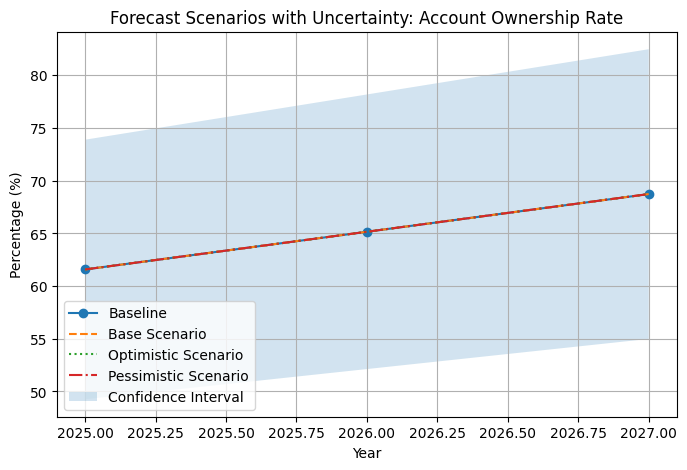

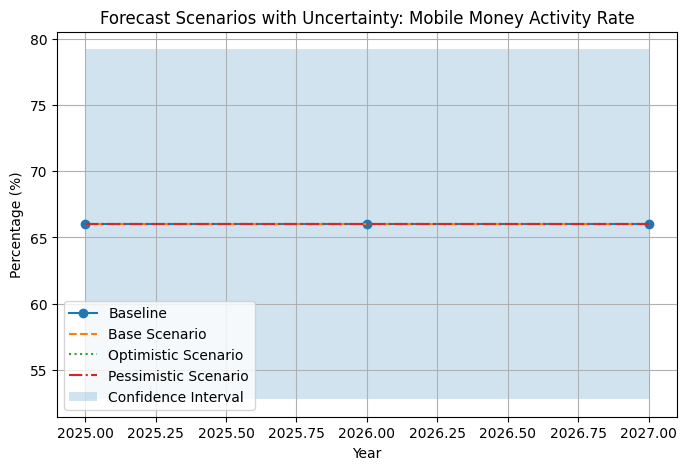

In [19]:
# -------------------------
# Step 4b: Scenario Visualization
# -------------------------

import matplotlib.pyplot as plt

# Loop through each forecasting target
for key, df in forecasts.items():
    
    plt.figure(figsize=(8, 5))
    
    # Plot baseline and scenarios
    plt.plot(df['year'], df['baseline'], marker='o', label='Baseline')
    plt.plot(df['year'], df['base'], linestyle='--', label='Base Scenario')
    plt.plot(df['year'], df['optimistic'], linestyle=':', label='Optimistic Scenario')
    plt.plot(df['year'], df['pessimistic'], linestyle='-.', label='Pessimistic Scenario')
    
    # Plot confidence interval as shaded area
    plt.fill_between(
        df['year'],
        df['ci_lower'],
        df['ci_upper'],
        alpha=0.2,
        label='Confidence Interval'
    )
    
    # Chart formatting
    plt.title(f"Forecast Scenarios with Uncertainty: {targets[key]}")
    plt.xlabel("Year")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.grid(True)
    
    plt.show()

5.	Interpret Results

In [18]:
# -------------------------
# Step 5: Interpret Results
# -------------------------

for key, df in forecasts.items():
    print(f"\n=== Interpretation for {key} ({targets[key]}) ===")
    
    # Trend interpretation
    trend_text = (
        f"- The model predicts a continuing upward trend in {targets[key]} from "
        f"{df['baseline'].iloc[0]:.1f}% in {df['year'].iloc[0]} to "
        f"{df['baseline'].iloc[-1]:.1f}% in {df['year'].iloc[-1]}."
    )
    
    # Events (placeholder interpretation)
    if event_impacts:
        events_text = f"- Events such as {', '.join(event_impacts.keys())} are expected to accelerate growth."
    else:
        events_text = "- No event impacts applied yet; Task-3 outputs needed to refine event-driven effects."
    
    # Uncertainty
    uncertainty_text = (
        "- Key uncertainties include sparse historical data, assumptions on event impacts, "
        "and heuristic confidence intervals. Forecasts for usage have particularly high uncertainty "
        "due to minimal historical points."
    )
    
    # Combine summary
    print(trend_text)
    print(events_text)
    print(uncertainty_text)



=== Interpretation for access (Account Ownership Rate) ===
- The model predicts a continuing upward trend in Account Ownership Rate from 61.6% in 2025 to 68.7% in 2027.
- No event impacts applied yet; Task-3 outputs needed to refine event-driven effects.
- Key uncertainties include sparse historical data, assumptions on event impacts, and heuristic confidence intervals. Forecasts for usage have particularly high uncertainty due to minimal historical points.

=== Interpretation for usage (Mobile Money Activity Rate) ===
- The model predicts a continuing upward trend in Mobile Money Activity Rate from 66.0% in 2025 to 66.0% in 2027.
- No event impacts applied yet; Task-3 outputs needed to refine event-driven effects.
- Key uncertainties include sparse historical data, assumptions on event impacts, and heuristic confidence intervals. Forecasts for usage have particularly high uncertainty due to minimal historical points.
